In [223]:
import os
import sys
import re
import math
import ast
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from argparse import ArgumentParser
%matplotlib inline

In [219]:
current_dir = os.getcwd()
project_root = Path(os.path.dirname(current_dir))
results_folder_path = Path(os.path.join(project_root, 'data', 'organized'))

# add parent dir to use modules
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

In [220]:
from preprocessing.helpers.io_utils import read_json_file
from notebook_helpers.postpro_cleaning import clean_well_tracking_df, extract_id_and_counts
from notebook_helpers.result_generation import plot_count_histograms_per_day, annotate_wells_on_image

#### Provide metadata path

In [227]:
metadata_paths = {
        'data/organized/04_29_25_cytation_SCB_vib-seeding_C347_U87_2025-05-05_17-23-57/C347/tracking_results_test/cropped_aligned/metadata.json',
        'data/organized/04_29_25_cytation_SCB_vib-seeding_C347_U87_2025-05-05_17-23-57/C347/tracking_results_test/roi_frames/metadata.json'
    }

In [228]:

for metadata_path in metadata_paths:
    # verify that file exists
    if os.path.exists(metadata_path):
        print("The metadata file exists.")
    else:
        print("The metadata file does not exist.")
    params = read_json_file(metadata_path)
    metadata_path = Path(metadata_path)
    microns_per_pixel = params.get("resolution", 0.645)
    frames_type = metadata_path.parents[0].name
    device_id = metadata_path.parents[1].name
    
    # for each well
    for well_fldpath in metadata_path.parent.iterdir():
        if well_fldpath.is_dir():
            well_id = well_fldpath.name
            excel_fname = f"{device_id}_{well_id}_roi_frames_combined_counts.xlsx"
            excel_path = well_fldpath / excel_fname

            # verify that file exists
            if os.path.exists(excel_fpath):
                print("The file exists.")
            else:
                print("The file does not exist.")

            df = pd.read_excel(excel_fpath)   # read excel file into dataframe
            clean_df = clean_well_tracking_df(df)  # get cleaned df
            counts_df = extract_id_and_counts()   # et df just for counts

            # plot and save histograms
            plot_out_dir = well_fldpath / 'plots'
            plot_count_histograms_per_day(counts_df, plot_out_dir)

            # save annotations
            unique_fnames = clean_df['source_file'].unique().tolist()
            for fname in unique_fnames:
                tokens = fname.split('_')
                img_fname = fname.split('.')[0]
                df_sub = clean_df[clean_df['source_file'] == fname]
                days = [item.split('_')[0] for item in df_sub.columns if item.endswith('counts')]
                img_folder_path = project_root / 'data' / 'organized' / folder_name / device_id / frames_type / well_id
                out_dir = well_fldpath
                annotate_wells_on_image(img_folder_path, img_fname, df_sub, days, microns_per_pixel, out_dir)
                break
        break

The metadata file does not exist.


FileNotFoundError: The file 'data/organized/04_29_25_cytation_SCB_vib-seeding_C347_U87_2025-05-05_17-23-57/C347/tracking_results_test/roi_frames/metadata.json' does not exist.

In [201]:
# provide data details
microns_per_pixel = 0.645
device_id = 'C347'
well_id = 'D6'
frames_type = 'roi_frames'
# frames_type = 'cropped_aligned'
folder_name = '04_29_25_cytation_SCB_vib-seeding_C347_U87_2025-05-05_17-23-57'
excel_fname = f"{device_id}_{well_id}_roi_frames_combined_counts.xlsx"

In [202]:
# generte filepath
excel_fpath = results_folder_path / folder_name / device_id / 'tracking_results_test' / frames_type / well_id / excel_fname 

# verify that file exists
if os.path.exists(excel_fpath):
    print("The file exists.")
else:
    print("The file does not exist.")

The file exists.


In [203]:
df = pd.read_excel(excel_fpath)
df.head()

,unique_well_id,source_file,day1_well_loc,day1_counts,day1_category,day2_well_loc,day2_counts,day2_category
0,C347D6W0,C347_D6_1_0_0_well_preds.csv,"(50, 74)",0,empty,NaN,NaN,NaN
1,C347D6W1,C347_D6_1_0_0_well_preds.csv,"(159, 74)",-254,non-single,"(167, 76)",-255.0,non-single
2,C347D6W2,C347_D6_1_0_0_well_preds.csv,"(268, 75)",1,single,"(275, 75)",0.0,empty
3,C347D6W3,C347_D6_1_0_0_well_preds.csv,"(375, 75)",1,single,"(382, 76)",2.0,non-single
4,C347D6W4,C347_D6_1_0_0_well_preds.csv,"(483, 76)",0,empty,"(490, 76)",0.0,empty


In [206]:
clean_df = clean_well_tracking_df(df)
counts_df = extract_id_and_counts()

In [207]:
counts_df.head(10)

,unique_well_id,source_file,day1_counts,day2_counts
0,C347D6W1,C347_D6_1_0_0_well_preds.csv,0,0
1,C347D6W2,C347_D6_1_0_0_well_preds.csv,1,0
2,C347D6W3,C347_D6_1_0_0_well_preds.csv,1,2
3,C347D6W4,C347_D6_1_0_0_well_preds.csv,0,0
4,C347D6W5,C347_D6_1_0_0_well_preds.csv,0,1
5,C347D6W6,C347_D6_1_0_0_well_preds.csv,0,0
6,C347D6W7,C347_D6_1_0_0_well_preds.csv,1,1
7,C347D6W8,C347_D6_1_0_0_well_preds.csv,3,5
8,C347D6W9,C347_D6_1_0_0_well_preds.csv,2,2
9,C347D6W11,C347_D6_1_0_0_well_preds.csv,0,1


### Generate Individual Counts Histogram

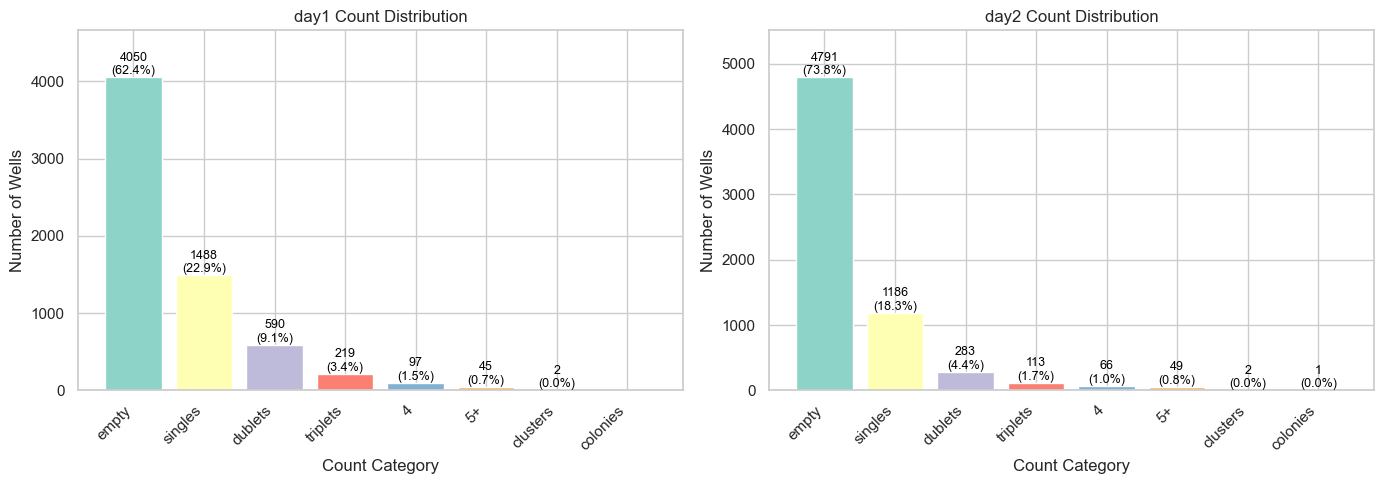

In [208]:
plot_count_histograms_per_day(counts_df)

### Generate Annotations

In [209]:
unique_fnames = clean_df['source_file'].unique().tolist()

In [212]:
for fname in unique_fnames:
    tokens = fname.split('_')
    device_id = tokens[0]
    well_id = tokens[1]
    img_fname = fname.split('.')[0]
    df_sub = clean_df[clean_df['source_file'] == fname]
    days = [item.split('_')[0] for item in df_sub.columns if item.endswith('counts')]
    img_folder_path = project_root / 'data' / 'organized' / folder_name / device_id / frames_type / well_id
    out_dir = project_root / 'data' / 'organized' / folder_name / device_id / 'tracking_results_test'/ frames_type / well_id
    annotate_wells_on_image(img_folder_path, img_fname, df_sub, days, microns_per_pixel, out_dir)
    break

Saved annotated images to D:\Projects\Clonogenic_Assay_Analysis_Multiday_Stitched\data\organized\04_29_25_cytation_SCB_vib-seeding_C347_U87_2025-05-05_17-23-57\C347\tracking_results_test\roi_frames\D6\annotations\day1
Saved annotated images to D:\Projects\Clonogenic_Assay_Analysis_Multiday_Stitched\data\organized\04_29_25_cytation_SCB_vib-seeding_C347_U87_2025-05-05_17-23-57\C347\tracking_results_test\roi_frames\D6\annotations\day2


In [155]:
folder_path

WindowsPath('D:/Projects/Clonogenic_Assay_Analysis_Multiday_Stitched/data/organized/04_29_25_cytation_SCB_vib-seeding_C347_U87_2025-05-05_17-23-57/C347/roi_frames/D6')

In [167]:
df_sub

,unique_well_id,source_file,day1_well_loc,day1_counts,day1_category,day2_well_loc,day2_counts,day2_category
0,C347D6W1,C347_D6_1_0_0_well_preds.csv,"(159, 74)",0,non-single,"(167, 76)",0,non-single
1,C347D6W2,C347_D6_1_0_0_well_preds.csv,"(268, 75)",1,single,"(275, 75)",0,empty
2,C347D6W3,C347_D6_1_0_0_well_preds.csv,"(375, 75)",1,single,"(382, 76)",2,non-single
3,C347D6W4,C347_D6_1_0_0_well_preds.csv,"(483, 76)",0,empty,"(490, 76)",0,empty
4,C347D6W5,C347_D6_1_0_0_well_preds.csv,"(591, 77)",0,empty,"(598, 77)",1,single
...,...,...,...,...,...,...,...,...
75,C347D6W84,C347_D6_1_0_0_well_preds.csv,"(479, 941)",2,non-single,"(485, 938)",0,empty
76,C347D6W85,C347_D6_1_0_0_well_preds.csv,"(587, 942)",0,empty,"(593, 939)",0,empty
77,C347D6W86,C347_D6_1_0_0_well_preds.csv,"(695, 943)",3,non-single,"(701, 940)",1,single
78,C347D6W88,C347_D6_1_0_0_well_preds.csv,"(910, 944)",0,empty,"(916, 941)",0,empty
